In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [58]:
from sklearn.datasets import make_classification

In [277]:
dataset = pd.read_csv("processed_dataset.csv", index_col=0)
dataset = (
    dataset.drop_duplicates()
)  # чтобы не было двух одинаковых точек (тогда dist=0)

X = dataset.drop(columns="RainTomorrow").to_numpy()
y = dataset["RainTomorrow"].to_numpy()

samples_idx = np.random.choice(len(X), 1000, replace=False)
X = X[samples_idx]
y = y[samples_idx]

X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, class_sep=1, n_clusters_per_class=1)
y = np.where(y == 0, -1, y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Получаем предсказания

In [279]:
from new_svm import SVM, LinearKernel, SquaredKernel, RBFKernel


model = SVM(1, LinearKernel())
res, mask = model.fit(X_train, y_train, maxiter=1000, ftol=1e-3)

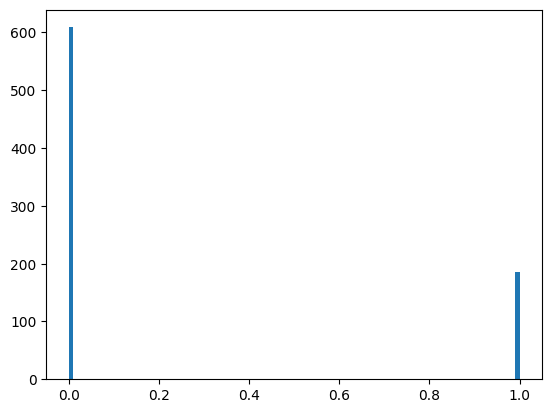

In [280]:
import matplotlib.pyplot as plt

plt.hist(res, bins=100)
plt.show()

In [281]:
predictions = []
for elem in X_test:
    predictions.append(model.predict(elem))

In [282]:
from utils import MetricsEstimator

metric_estimator = MetricsEstimator()

metric_estimator.get_metrics(y_test, np.array(predictions).astype(int))

print(metric_estimator)

accuracy = 0.89
precision = 0.9026548672566371
recall = 0.9026548672566371
f1_score = 0.9026548672566371


# Сравнение с эталонным методом

In [283]:
from sklearn.svm import SVC

In [284]:
sklearn_model = SVC(kernel="linear")
sklearn_model.fit(X_train, y_train)

,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [285]:
sklearn_predictions = sklearn_model.predict(X_test)
metric_estimator.get_metrics(y_test, sklearn_predictions.astype(int))

In [286]:
print(metric_estimator)

accuracy = 0.895
precision = 0.896551724137931
recall = 0.9203539823008849
f1_score = 0.908296943231441


# Визуализация решения

[]

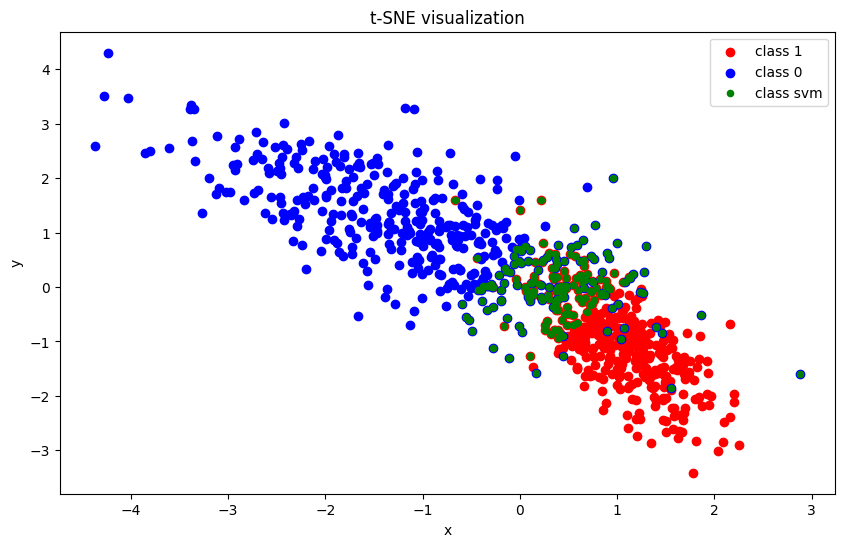

In [287]:
from sklearn.manifold import TSNE

# X_train_reduced = TSNE(
#     n_components=2, learning_rate="auto", init="random", perplexity=15
# ).fit_transform(X_train)
X_train_reduced = X_train


plt.figure(figsize=(10, 6))
plt.scatter(
    X_train_reduced[y_train == 1][:, 0],
    X_train_reduced[y_train == 1][:, 1],
    c="red",
    label="class 1",
)
plt.scatter(
    X_train_reduced[y_train == -1][:, 0],
    X_train_reduced[y_train == -1][:, 1],
    c="blue",
    label="class 0",
)

# plt.scatter(
#     X_train_reduced[mask][:, 0],
#     X_train_reduced[mask][:, 1],
#     c="green",
#     s=20,
#     label="class svm",
# )

plt.scatter(
    X_train_reduced[mask][:, 0],
    X_train_reduced[mask][:, 1],
    c="green",
    s=20,
    label="class svm",
)

plt.title("t-SNE visualization")
plt.legend()
plt.xlabel("x")
plt.ylabel("y")
plt.plot()